In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_csv("../input/kepler-labelled-time-series-data/exoTrain.csv")

In [4]:
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [5]:
train_df.shape

(5087, 3198)

In [6]:
train_df[train_df.isnull().any(axis = 1)]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197


<Axes: >

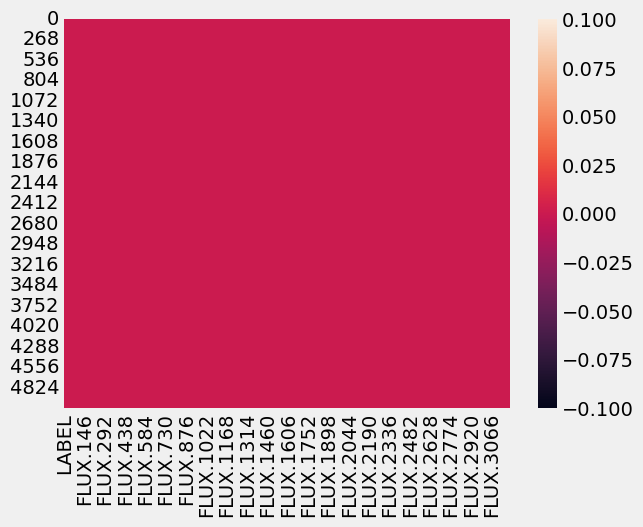

In [7]:
sns.heatmap(train_df.isnull())

In [8]:
train_df['LABEL'].unique()

array([2, 1])

In [9]:
list(train_df[train_df['LABEL'] == 2].index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

[Text(0, 0, '5050'), Text(0, 0, '37')]

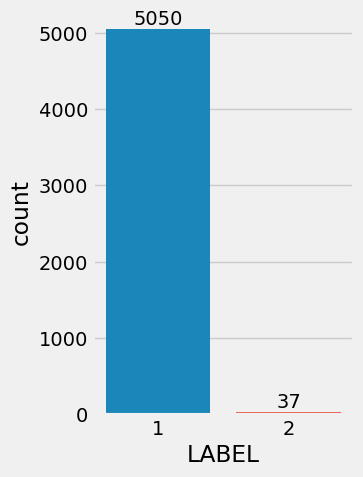

In [10]:
plt.figure(figsize = (3,5))
ax = sns.countplot(x='LABEL',  data = train_df)
ax.bar_label(ax.containers[0])

In [11]:
#Replacing the labels
train_df = train_df.replace({"LABEL" : {2:1, 1:0}})
train_df.LABEL.unique()

array([1, 0])

In [12]:
plot_df = train_df.drop(["LABEL"], axis =1)
plot_df

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


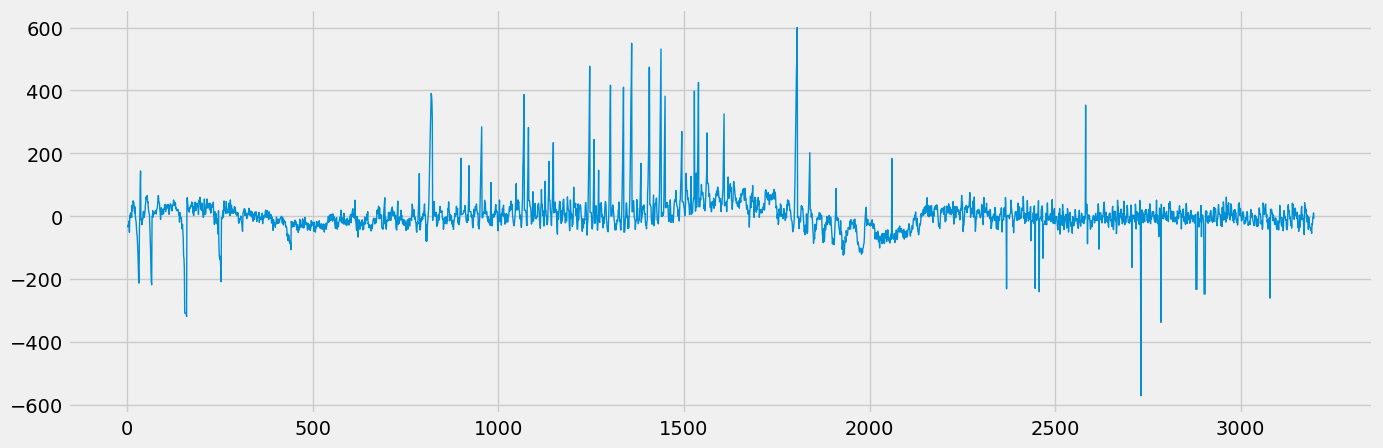

In [13]:
time = range(1, 3198)
flux_val = plot_df.iloc[38, :].values
plt.figure(figsize = (15,5))
plt.plot(time, flux_val , linewidth = 1)

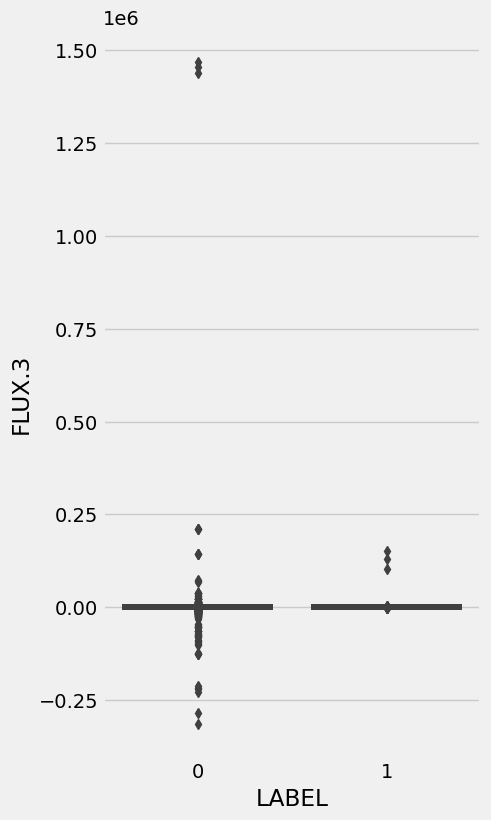

In [14]:
plt.figure(figsize = (20,9))
for i in range(1,4):
    plt.subplot(1,4,1)
    sns.boxplot(data = train_df, x = 'LABEL', y = 'FLUX.'+ str(i))

In [15]:
train_df.drop(train_df[train_df['FLUX.2'] > 0.25E6].index, axis =0, inplace =True)

<Axes: xlabel='LABEL', ylabel='FLUX.376'>

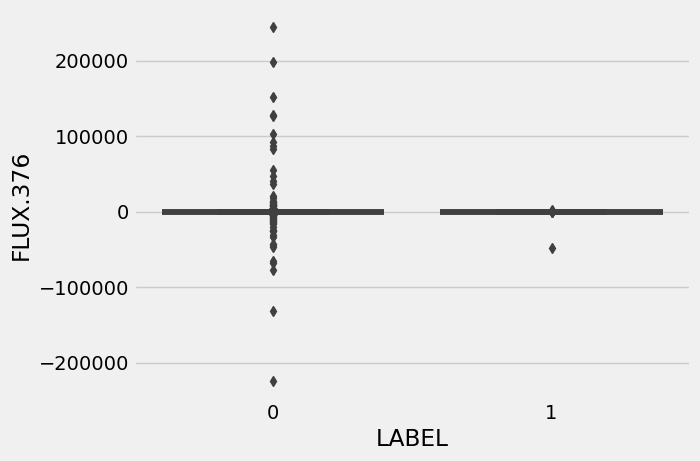

In [16]:
sns.boxplot(data = train_df , x ="LABEL", y = 'FLUX.'+str(np.random.randint(1000)))

In [18]:
# extracting independent (x) and dependent (y) features from train df
x = train_df.drop(['LABEL'], axis = 1)
y = train_df.LABEL
x, y

(       FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7   FLUX.8  \
 0       93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   -96.27   
 1      -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   -85.33   
 2      532.64   535.92   513.73   496.92   456.45   466.00  464.50   486.39   
 3      326.52   347.39   302.35   298.13   317.74   312.70  322.33   311.31   
 4    -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34 -1022.71   
 ...       ...      ...      ...      ...      ...      ...     ...      ...   
 5082   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   -49.25   
 5083   989.75   891.01   908.53   851.83   755.11   615.78  595.77   458.87   
 5084   273.39   278.00   261.73   236.99   280.73   264.90  252.92   254.88   
 5085     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85    -0.03   
 5086   323.28   306.36   293.16   287.67   249.89   218.30  188.86   178.93   
 
       FLUX.9  FLUX.10  ...  FLUX.3188

In [19]:
#splitting data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [27]:
from sklearn.neighbors import KNeighborsClassifier as KNC

knn_classifier = KNC(n_neighbors = 5, metric = 'minkowski', p = 2)
#fitting the model
knn_classifier.fit(X_train_sc, y_train)
#predict
y_pred = knn_classifier.predict(X_test_sc)
#results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print("Validation accuracy of KNN:- ", accuracy_score(y_test, y_pred))
print()
print("Classification report:- \n", classification_report(y_test, y_pred))




Validation accuracy of KNN:-  0.991480996068152

Classification report:- 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1513
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.99      0.99      1526



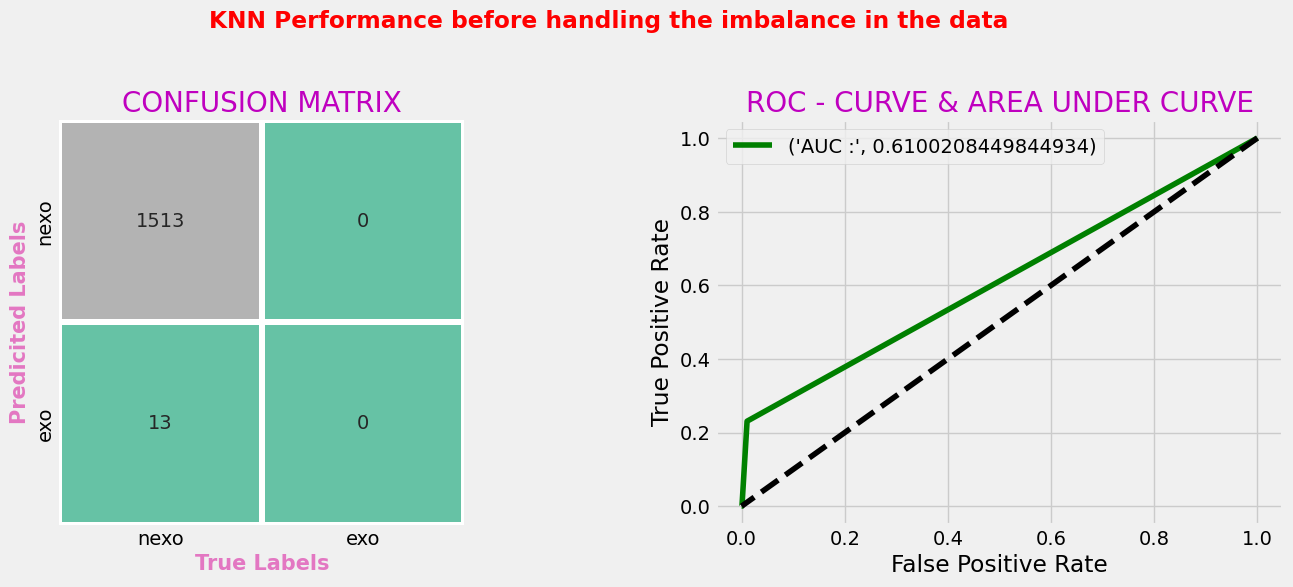

In [28]:
#Confusion matrix
plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance before handling the imbalance in the data", color = 'r', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Set2",fmt = "d",linewidths=3, cbar = False,
           xticklabels=['nexo', 'exo'], yticklabels=['nexo','exo'], square = True)
plt.xlabel("True Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.ylabel("Predicited Labels", fontsize = 15, weight = 'bold', color = 'tab:pink')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'm')

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_classifier.predict_proba(X_test_sc)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("AUC :",auc(fpr,tpr)),color = "g")
plt.plot([1,0],[1,0],"k--")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20, color = 'm')
plt.show()

In [29]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)

<Axes: >

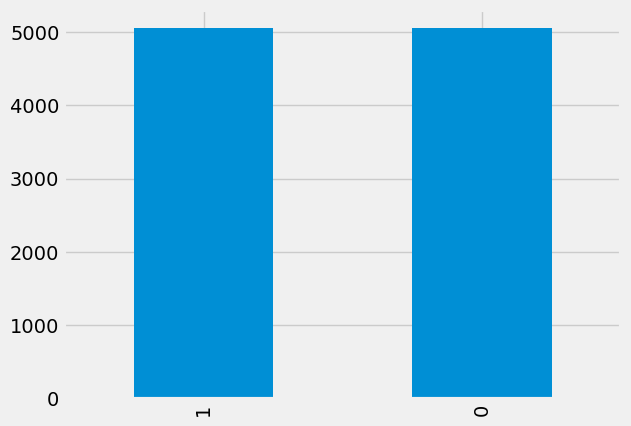

In [30]:
y_ros.value_counts().plot(kind = 'bar')

In [31]:
from collections import Counter
print(f"Before ROS:- {Counter(y)}\nAfter ROS:- {Counter(y_ros)}")

Before ROS:- Counter({0: 5049, 1: 37})
After ROS:- Counter({1: 5049, 0: 5049})


In [32]:
print(list(y_ros.values[:5086]))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [33]:
print(list(y_ros.values[5086:]))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [34]:
#  ****************************************************************
# | Performing split and scaling on the random over sampled data  |
# ****************************************************************

X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 0)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [35]:
# Create function to fetch the optimal value of K
def optimal_Kval_KNN(start_k, end_k, x_train, x_test, y_train, y_test, progress = True):
    ''' 
    This function takes in the following arguments -
    start_k - start value of k
    end_k - end value of k
    x_train - independent training values for training the KNN
    x_test - independent testing values for prediction
    y_train - dependent training values for training KNN
    y_test - dependent testing values for computing error rate
    progress - if true shows the progress for each k (by default its set to True)
    '''
    # Header
    print(f"Fetching the optimal value of K in between {start_k} & {end_k} ~\n\nIn progress...")
    
    # Empty list to append error rate
    mean_err = []
    for K in range(start_k, end_k + 1):                         # Generates K from start to end-1 values
        knn = KNC(n_neighbors = K)                              # Build KNN for respective K value
        knn.fit(x_train, y_train)                               # Train the model
        err_rate = np.mean(knn.predict(x_test) != y_test)       # Get the error rate
        mean_err.append(err_rate)                               # Append it
        # If progress is true display the error rate for each K
        if progress == True:print(f'For K = {K}, mean error = {err_rate:.3}')
        
    # Get the optimal value of k and corresponding value of mean error
    k, val = mean_err.index(min(mean_err))+1, min(mean_err)
    
       # Footer
    print('\nDone! Here is how error rate varies wrt to K values:- \n')
    
    # Display how error rate changes wrt K values and mark the optimal K value
    plt.figure(figsize = (5,5))
    plt.plot(range(start_k,end_k + 1), mean_err, 'mo--', markersize = 8, markerfacecolor = 'c',
            linewidth = 1)          # plots all mean error wrt K values
    plt.plot(k, val, marker = 'o', markersize = 8, markerfacecolor = 'gold', 
             markeredgecolor = 'g') # highlits the optimal K
    plt.title(f"The optimal performance is obtained at K = {k}", color = 'r', weight = 'bold',
             fontsize = 15)
    plt.ylabel("Error Rate", color = 'olive', fontsize = 13)
    plt.xlabel("K values", color = 'olive', fontsize = 13)
    
    '''returns the optimal value of k'''
    return k

Fetching the optimal value of K in between 1 & 10 ~

In progress...
For K = 1, mean error = 0.00132
For K = 2, mean error = 0.00132
For K = 3, mean error = 0.00264
For K = 4, mean error = 0.00264
For K = 5, mean error = 0.00462
For K = 6, mean error = 0.00462
For K = 7, mean error = 0.00528
For K = 8, mean error = 0.00528
For K = 9, mean error = 0.00792
For K = 10, mean error = 0.00792

Done! Here is how error rate varies wrt to K values:- 



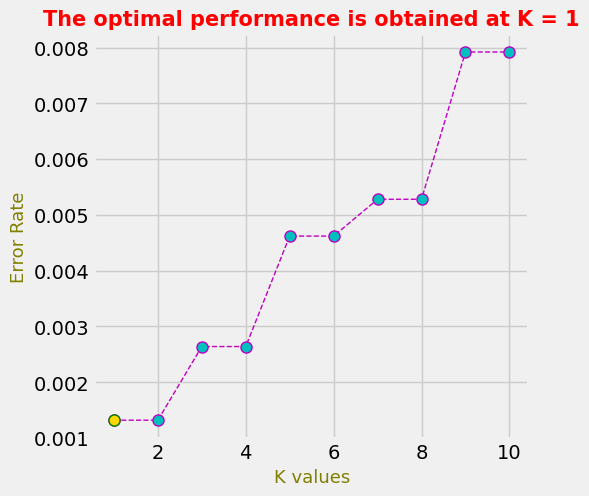

In [36]:
k = optimal_Kval_KNN(1, 10, X_train_sc, X_test_sc, y_train, y_test)


Validation accuracy of KNN is 0.9986798679867986

-------------------------------------------------------

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1518

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



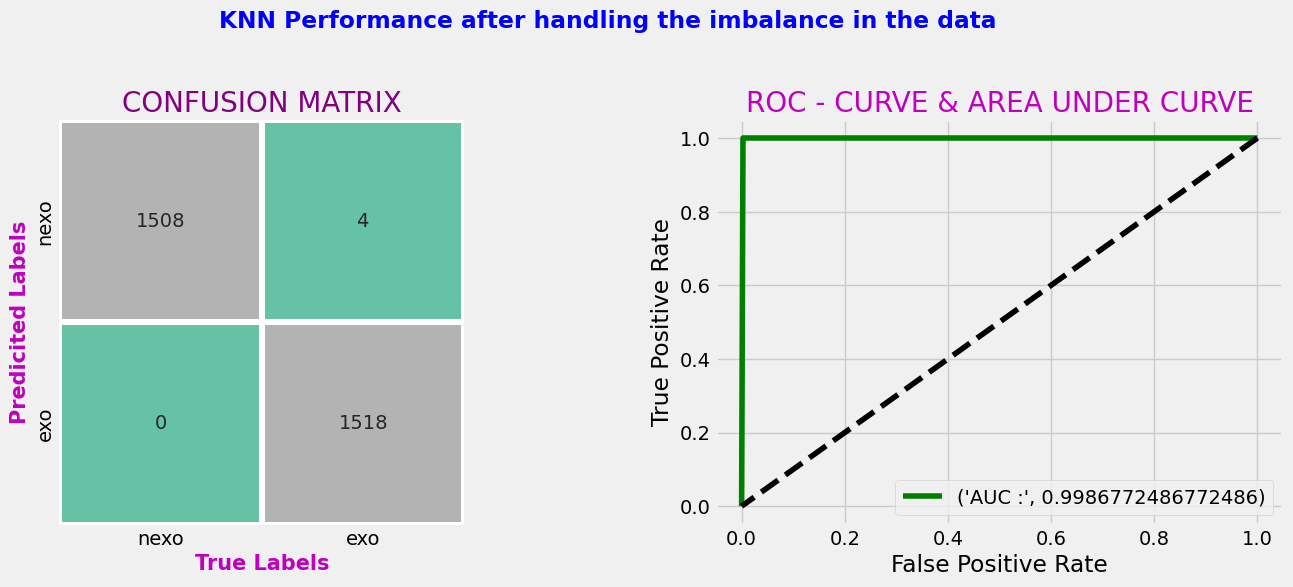

In [37]:
# Fiting the KNN Classifier Model on to the training data after

# Choosing K = 1
knn_classifier = KNC(n_neighbors=1,metric='minkowski',p=2)  
'''metric is to be by default minkowski for p = 2 to calculate the Eucledian distances'''

# Fit the model
knn_classifier.fit(X_train_sc, y_train)

# Predict
y_pred = knn_classifier.predict(X_test_sc)

# Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

print('\nValidation accuracy of KNN is', accuracy_score(y_test,y_pred))
print("\n-------------------------------------------------------")
print ("\nClassification report :\n",(classification_report(y_test,y_pred)))


#Confusion matrix
plt.figure(figsize=(15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance after handling the imbalance in the data", color = 'b', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Set2",fmt = "d",linewidths=3, cbar = False,
           xticklabels=['nexo', 'exo'], yticklabels=['nexo','exo'], square = True)
plt.xlabel("True Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.ylabel("Predicited Labels", fontsize = 15, weight = 'bold', color = 'm')
plt.title("CONFUSION MATRIX",fontsize=20, color = 'purple')

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_classifier.predict_proba(X_test_sc)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("AUC :",auc(fpr,tpr)),color = "g")
plt.plot([1,0],[1,0], 'k--')
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20, color = 'm')
plt.show()
